Implement the function stubs in altproj_code.py and complete lines with "###"

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from numpy.random import rand, randn
from scipy.linalg import inv, svd
from scipy.optimize import linprog
from tqdm import tqdm_notebook as tqdm

from altproj_code import null_space, altproj, lp_altproj, kaczmarz, data_split

def confmat(y, yhat, num_classes):
    cm = np.zeros((num_classes, num_classes))
    for i in range(y.shape[0]):
        a= int(y[i])
        b= int(yhat[i])
        if num_classes ==2:
            a = (a+1)//2
            b = (b+1)//2
        cm[a,b]+=1
    return cm

### Exercise 1
(10 pts program + 5 pts solution)
Let $U$ and $W$ be subspaces of $\mathbb{R}^5$ that are spanned, respectively, by the columns of the matrices $A$ and $B$ (shown below). 
Write a function `altproj(A,B,v0,n)` that returns $\underline{v}_{2n}$ after $2n$ steps of alternating projection onto $U$ and $W$ starting from $\underline{v}_0$. 
Use this function to find the orthogonal projection of $\underline{v}_0$ (shown below) onto $ U \cap W $. How large should $n$ be chosen so that the projection is correct to 4 decimal places (e.g., absolute error at most 0.0001 in each coordinate)?
$$
A = 
\begin{bmatrix}
 3 & 2 & 3 \\ 1 & 5 & 7 \\ 4 & 11 & 13 \\ 1 & 17 & 19 \\ 5 & 23 & 29
\end{bmatrix}, \qquad
B = 
\begin{bmatrix}
 1 & 1 & 2.5 \\ 2 & 0 & 6 \\ 2 & 1 & 12 \\ 2 & 0 & 18 \\ 6 & -3 & 26
\end{bmatrix}, \qquad
\underline{v}_0 =
\begin{bmatrix}
 1 \\2 \\ 3 \\ 4 \\ 5
\end{bmatrix}
$$
To find the intersection of $U$ and $W$, we note that the following Python snippet returns a matrix whose columns span $ U \cap W $
```
basis_UintW = np.hstack([A, B]) @ null_space(np.hstack([A, -B])) 
```

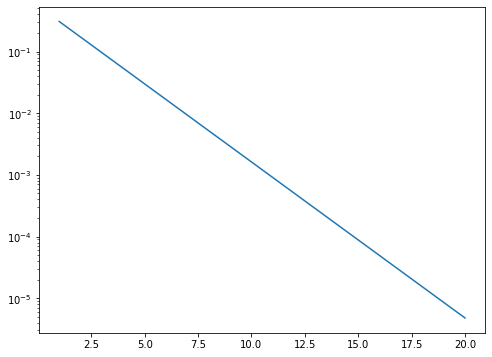

In [2]:
A = np.array([[3, 1, 4, 1, 5], [2, 5, 11, 17, 23], [3, 7, 13, 19, 29]]).T
B = np.array([[1, 2, 2, 2, 6], [1, 0, 1, 0, -3], [2.5, 6, 12, 18, 26]]).T
v0 = np.array([1, 2, 3, 4, 5])
n = 20
v, err = altproj(A, B, v0, n)

plt.figure(figsize=(8, 6))
plt.semilogy(np.arange(1, n + 1), err)

### Exercise 2
(10 pts program + 5 pts solution)
Write a function `kaczmarz(A,b,I)` that returns a matrix $X$ with $I$ columns corresponding
to the Kaczmarz iteration after $i = 1, 2, ..., I$ full passes through the Kaczmarz algorithm
for the matrix $A$ and right-hand side $\underline{b}$ (e.g., one full pass equals $m$ steps). 
Use this function to find the minimum-norm solution of linear system $A \underline{x} = \underline{b}$ for
$$
A = 
\begin{bmatrix}
 2 & 5 & 11 & 17 & 23 \\ 3 & 7 & 13 & 19 & 29
\end{bmatrix}, \qquad
\underline{b} =
\begin{bmatrix}
 228 \\ 227
\end{bmatrix}
$$
Plot the error (on a log scale) versus the number of full passes for $I = 500$.

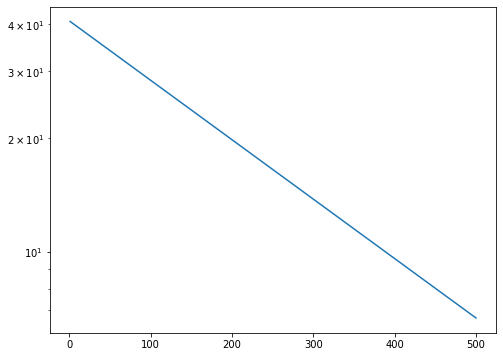

In [3]:
A = np.array([[2, 5, 11, 17, 23], [3, 7, 13, 19, 29]])
b = np.array([228, 227])
I = 500
X, err = kaczmarz(A, b, I)

plt.figure(figsize=(8, 6))
plt.semilogy(np.arange(1, I + 1), err)

### Exercise 3
(10 pts)
Repeat the experiment with $I = 100$ for a random system defined by `A = randn(500,1000)`
and `b = A @ randn(1000)`. 
Compare the iterative solution with the true minimum-norm solution 
$ \hat{\underline{x}} = A^H {(A A^H)}^{-1} \underline{b} $.

(1000,)


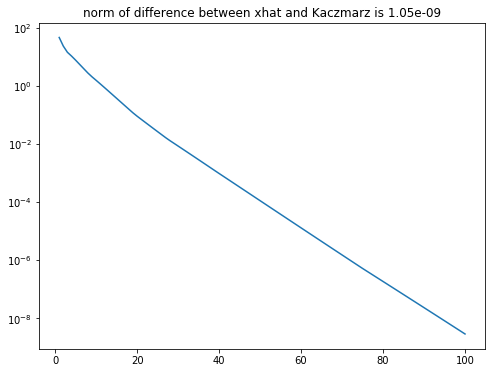

In [4]:
A = randn(500, 1000)
b = A @ randn(1000)
I = 100
X, err = kaczmarz(A, b, I)

plt.figure(figsize=(8, 6))
plt.semilogy(np.arange(1, I + 1), err)

x_hat = A.T.dot(inv(A.dot(A.T))).dot(b)
print(x_hat.shape)
### x_hat_err = 

plt.title(f'norm of difference between xhat and Kaczmarz is {np.linalg.norm(x_hat - X[:, -1]):.2e}');

### Exercise 4
(10 pts program + 5 pts solution)
Consider the linear program
$$
\min ~ \underline{c}^T \underline{x}
\quad \textrm{subject to} \quad
A \underline{x} \ge \underline{b}, \quad \underline{x} \ge 0
$$
with
$$
\underline{c} = 
\begin{bmatrix}
    3 \\ -1 \\ 2
\end{bmatrix}, \quad
A = 
\begin{bmatrix}
    2 & -1 & 1 \\ 1 & 0 & 2 \\ -7 & 4 & -6
\end{bmatrix}, \quad
\underline{b} = 
\begin{bmatrix}
    -1 \\ 2 \\ 1
\end{bmatrix}, \quad
$$
Let $p^*$ denote the optimum value of this program.
Then, $p^* \le 0$ is satisfied if and only if there is a non-negative $\underline{x} = (x_1, x_2, x_3)^T$ satisfying
$$
\begin{align}
2x_1 - x_2 + x_3 &\ge -1 \\
x_1 + 2x_3 &\ge 2 \\
-7x_1 + 4x_2 - 6x_3 &\ge 1 \\
-3x_1 + x_2 - 2x_3 &\ge 0
\end{align}
$$
where the last inequality restricts the value of the program to be at most $0$.
One can find the optimum value `p` and an optimizer `x` with the command 
```
res = linprog(c, A_ub=-A, b_ub=-b, bounds=[(0, None)] * c.size, method=’interior-point’)
x, p = res.x, res.fun
```

Starting from $\underline{x}_0 = 0$, write a program that uses alternating projections onto half spaces (see (6)) to find a non-negative vector satisfying the above inequalities. 

Warning: don’t forget to also project onto the half spaces defined by the non-negativity constraints $ x_1 \ge 0, x_2 \ge 0, x_3 \ge 0 $. 

Use the result to find a vector that satisfies all the inequalities. 
How many iterations are required so that the
absolute error is at most 0.0001 in each coordinate?

     con: array([], dtype=float64)
     fun: 1.8272050539280826e-12
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([8.82960371e-13, 3.84137167e-13, 1.00000000e+00])
  status: 0
 success: True
       x: array([1.50428214e-12, 2.00000000e+00, 1.00000000e+00])
(7, 3)
False False


array([0., 2., 1.])

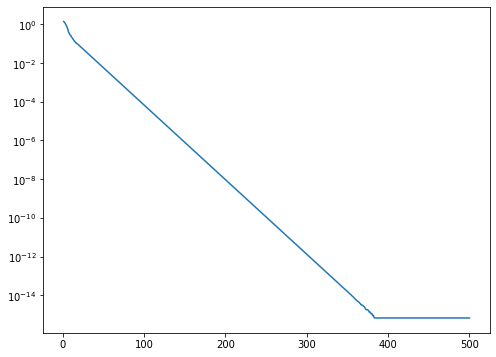

In [5]:
c = np.array([3, -1, 2])
A = np.array([[2, -1, 1], [1, 0, 2], [-7, 4, -6]])
b = np.array([-1, 2, 1])

res = linprog(c, A_ub=-A, b_ub=-b, bounds=[(0, None)] * c.size, method='interior-point')
print(res)

I = 500
n=A.shape[0]
dim=A.shape[1]
A1 = np.vstack((A,-c, np.eye(dim)))
print(A1.shape)
b1 = np.zeros((n+1+dim,))
b1[0:n]=b

# Do not forget constraint xi >= 0
### A1 = 
### b1 = 

x, err = lp_altproj(A1, b1, I)

plt.figure(figsize=(8, 6))
plt.semilogy(np.arange(1, I + 1), err)

print(np.all(A @ x - b > 0), np.all(x > 0))
x

### Exercise 5
(10 pts + 5 pts for value and strict feasibililty point)
Consider the “random” convex optimization problem defined by
```
c = randn(1000)
A = np.vstack([-np.ones((1, 1000)), randn(500, 1000)])
b = np.concatenate([[-1000], A[1:] @ rand(1000)])
```
Modify $A$ and $b$ (by adding one row and one element) so that your function can be used to prove that the value of the convex optimization problem, in (3), is at most −1000. Try using `I = 1000` passes
through all 501 inequality constraints.
This type of iteration typically terminates with an “almost feasible” $\underline{x}$. 
To find a strictly feasible point, try running the same algorithm with the argument $ \underline{b} + \epsilon $ for some small $ \epsilon > 0 $  (e.g., try $ \epsilon = {10}^{-6} $).
Then, the resulting $ \underline{x} $ can satisfy `np.all(A @ x - b > 0)`

(1502,)
True True [-1000.000001]
-1198.5327823524285


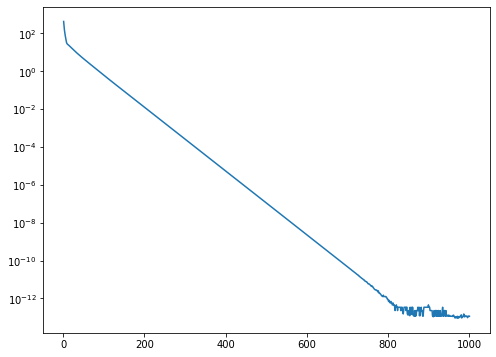

In [6]:
np.random.seed(0)
c = randn(1000)
A = np.vstack([-np.ones((1, 1000)), randn(500, 1000)])
b = np.concatenate([[-1000], A[1:] @ rand(1000)])

I, ep = 1000, 1e-6
# Do not forget constraint xi >= 0, and c^T x <= -1000
A1 = np.vstack([A,-c, np.eye(1000)])
n=A1.shape[0]
b1 = np.concatenate([b,[1000],np.zeros(1000)])
print(b1.shape)

x, err = lp_altproj(A1, b1 + ep, I)
print(np.all(A @ x - b > 0), np.all(x > 0), c.reshape(1, -1) @ x)

plt.figure(figsize=(8, 6))
plt.semilogy(np.arange(1, I + 1), err)

res = linprog(c, A_ub=-A, b_ub=-b, bounds=[(0, None)] * 1000, method='interior-point')
print(res.fun)

### Exercise 6
(10 pts) Repeat the MNIST training exercise from the Least-Squares Handout using the training method described above. 
First, extract the indices of all the 2’s and randomly separate the samples into equal-sized training and testing groups. 
Second, do the same for the 3’s. Now, extend each vector to length 785 by appending a −1. This will allow the system to learn a general hyperplane separation.

Next, use alternating projections to design a linear classifier to separate for 2’s and 3’s. For the resulting linear function, report the classification error rate and confusion matrices for the both the training and test sets. Is there any benefit to choosing $s<1$? Also, for the test set, compute the histogram of the function output separately for each class and then plot the two histograms together. 
This shows easy or hard it is to separate the two classes.

Depending on your randomized separation into training and test sets, the training data may or may not be linearly separable. 
Comment on what happens to the test set performance when the error rate does converge to zero for the training set.

Pairwise experiment, mapping 2 to -1, mapping 3 to 1
training error = 25.91%, testing error = 27.28%
Training set confusion matrix:
 [[1771. 1988.]
 [   0. 3915.]]
Testing set confusion matrix:
 [[187. 231.]
 [  2. 434.]]


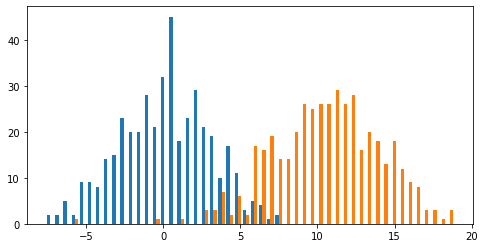

In [17]:
def mnist_pairwise_altproj(df, a, b, solver, test_size=0.1, verbose=False):

    Xa_tr, Xa_te, ya_tr, ya_te = data_split(df, a, test_size)
    Xb_tr, Xb_te, yb_tr, yb_te = data_split(df, b, test_size)    
    for i in range(ya_tr.shape[0]):
        ya_tr[i]=-1
    for i in range(ya_te.shape[0]):
        ya_te[i]=-1
    for i in range(yb_tr.shape[0]):
        yb_tr[i]=1
    for i in range(yb_te.shape[0]):
        yb_te[i]=1  
    X_tr = np.concatenate((Xa_tr, Xb_tr), axis=0)
    X_te = np.concatenate((Xa_te, Xb_te), axis=0)
    y_te = np.concatenate((ya_te, yb_te), axis=0)
    y_tr = np.concatenate((ya_tr, yb_tr), axis=0)
    A_star = np.multiply(X_tr, y_tr[:, np.newaxis])
    z_hat, err = solver(A_star, np.ones(y_tr.shape[0]))
    y_hat_tr = X_tr.dot(z_hat)
    for i in range(y_hat_tr.shape[0]):
        if y_hat_tr[i]>=0:
            y_hat_tr[i]=1
        else:
            y_hat_tr[i]=-1
    cm_tr=confmat(y_tr, y_hat_tr, 2)
    err_tr = (cm_tr[0,1]+cm_tr[1,0])/(y_hat_tr.shape[0])
    y_hat_te = X_te.dot(z_hat)
    for i in range(y_hat_te.shape[0]):
        if y_hat_te[i]>=0:
            y_hat_te[i]=1
        else:
            y_hat_te[i]=-1   
    cm_te=confmat(y_te, y_hat_te, 2)
    err_te = (cm_te[0,1]+cm_te[1,0])/(y_hat_te.shape[0])   
    if verbose:
        print('Pairwise experiment, mapping {0} to -1, mapping {1} to 1'.format(a, b))
        print('training error = {0:.2f}%, testing error = {1:.2f}%'.format(100 * err_tr, 100 * err_te))
        print('Training set confusion matrix:\n {0}'.format(cm_tr))
        print('Testing set confusion matrix:\n {0}'.format(cm_te))
        ya_te_hat = Xa_te.dot(z_hat)
        yb_te_hat = Xb_te.dot(z_hat)
        output = [ya_te_hat, yb_te_hat]
        plt.figure(figsize=(8, 4))
        plt.hist(output, bins=50)  
    res = np.array([err_tr, err_te])
    return z_hat, res

pdf = pd.read_csv('mnist_train.csv')
# append feature column by merging all pixel columns
pdf['feature'] = pdf.apply(lambda row: row.values[1:], axis=1)
# only keep feature and label column
pdf = pdf[['feature', 'label']]
pdf.head()

solver = lambda A, b: lp_altproj(A, b + 1e-6, 100, 1)
z_hat, res = mnist_pairwise_altproj(pdf, 2, 3, solver, verbose=True)

### Exercise 7
(10 pts program + 10 pts solution)
Describe how this approach should be extended to multi-class linear classification
(parameterized by $ Z \in \mathbb{R}^{n \times d} $) where the classifier maps a vector $\underline{v}$ to class $j$ if the $j$-th element
of $ Z^T \underline{v} $ is the largest element in the vector. 
Use the implied alternating-projection solution to design a multi-class classifier for MNIST.
Is there any benefit to choosing $s<1$?

In [18]:
def mnist_multiclass_altproj(df, solver, test_size=0.5):
    indices = np.arange(len(df))
    np.random.shuffle(indices)
    df = df.iloc[indices]
    trainset, testset = df.iloc[0:int(test_size * len(df))], df.iloc[int(test_size * len(df)):len(df)]
    X_tr = np.stack(trainset.values[:, 0], axis=0)
    X_tr = np.append(X_tr, -1 * np.ones((X_tr.shape[0], 1)), 1)
    X_te = np.stack(testset.values[:, 0], axis=0)
    X_te = np.append(X_te, -1 * np.ones((X_te.shape[0], 1)), 1)
    y_tr = np.array(trainset.values[:, 1])
    y_te = np.array(testset.values[:, 1])
    A_hat = np.zeros((X_tr.shape[0] * 9, X_tr.shape[1] * 10))
    for i in range(X_tr.shape[0]):
        for j in range(10):
            if j < y_tr[i]:
                A_hat[9 * i + j, y_tr[i] * 785:(y_tr[i] + 1) * 785] = X_tr[i]
                A_hat[9 * i + j, j * 785:(j + 1) * 785] = -1 * X_tr[i]
            if j > y_tr[i]:
                A_hat[9 * i + j - 1, y_tr[i] * 785:(y_tr[i] + 1) * 785] = X_tr[i]
                A_hat[9 * i + j - 1, (j) * 785:(j + 1) * 785] = -1 * X_tr[i]
    b_tilde = np.zeros(len(A_hat))
    Z, err = solver(A_hat, b_tilde)
    Z = np.reshape(Z, (10, 785))
    Z = Z.T
    y_hat_tr = X_tr @ Z
    y_hat_te = X_te @ Z
    err_train = np.sum(np.array([np.argmax(y_hat_tr, axis=1) != y_tr])) / len(y_tr)
    err_test = np.sum(np.array([np.argmax(y_hat_te, axis=1) != y_te])) / len(y_te)
    confmat_train = confmat(y_tr.astype(int), np.argmax(y_hat_tr, axis=1).astype(int), 10)
    confmat_test = confmat(y_te.astype(int), np.argmax(y_hat_te, axis=1).astype(int), 10)
    res = np.array([err_train, err_test])
    print('Train error = {0:.2f}%, Test error = {1:.2f}%'.format(100 * err_train, 100 * err_test))
    print('training set confusion matrix:\n {0}'.format(confmat_train))
    print('testing set confusion matrix:\n {0}'.format(confmat_test))
    return Z, res



pdf = pd.read_csv('mnist_train.csv')
pdf['feature'] = pdf.apply(lambda row: row.values[1:], axis=1)
pdf = pdf[['feature', 'label']]
pdf.head()

solver = lambda A, b: lp_altproj(A, b + 1e-6, 20)
Z, res = mnist_multiclass_altproj(pdf, solver)

Train error = 9.42%, Test error = 12.94%
training set confusion matrix:
 [[2.005e+03 0.000e+00 8.000e+00 1.000e+00 2.000e+00 2.700e+01 2.300e+01
  2.000e+00 6.000e+00 2.000e+00]
 [0.000e+00 2.293e+03 1.200e+01 7.000e+00 1.000e+00 5.000e+00 5.000e+00
  1.100e+01 3.000e+01 2.000e+00]
 [7.000e+00 1.300e+01 1.880e+03 4.500e+01 4.000e+00 1.600e+01 3.000e+01
  3.500e+01 4.700e+01 8.000e+00]
 [1.100e+01 5.000e+00 5.000e+01 1.716e+03 1.000e+00 1.960e+02 6.000e+00
  4.200e+01 8.400e+01 2.800e+01]
 [2.000e+00 3.000e+00 3.500e+01 1.000e+00 1.761e+03 2.800e+01 6.200e+01
  2.700e+01 2.600e+01 9.600e+01]
 [2.400e+01 2.000e+00 1.000e+01 3.600e+01 3.000e+00 1.649e+03 2.700e+01
  1.500e+01 8.600e+01 1.400e+01]
 [1.700e+01 0.000e+00 3.000e+00 0.000e+00 2.000e+00 3.400e+01 2.014e+03
  0.000e+00 2.000e+00 0.000e+00]
 [3.000e+00 2.000e+00 7.000e+00 6.000e+00 5.000e+00 1.000e+00 0.000e+00
  2.151e+03 2.000e+00 1.700e+01]
 [1.600e+01 2.000e+01 1.600e+01 3.800e+01 3.000e+00 1.240e+02 1.800e+01
  1.500e+01 1.7

### Exercise 8
(optional)
Let $ V = \mathbb{R}^2 $ and consider the orthogonal projection of $ \underline{u} = (1, -2) $ onto the intersection of
$$
\begin{align}
    C_1 &= \left\{ \underline{v} \in V \,\mid\, v_2 \ge 0 \right\} \\
    C_2 &= \left\{ \underline{v} \in V \,\mid\, v_1^2 + \left(v_2 - \frac{\sqrt{3}}{2}\right)^2 \le 1 \right\}
\end{align}
$$
Draw a picture illustrating the algernating projections (without Dykstra's modification) defined by: $ P_{C_2}(P_{C_1}(\underline{u})) $ and $ P_{C_1}(P_{C_2}(\underline{u})) $.
Does either give the desired result $ P_{C_1 \cap C_2}(\underline{u}) $?
Now, try Dykstra's algorithm using both orders and 4 iterations.
Are these approaching $ P_{C_1 \cap C_2}(\underline{u}) $?